### Adaboost

https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
# Load Iris data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create AdaBoost classifier with 50 weak learners (stumps by default)
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
# Evaluate and print results
print("Test accuracy:", clf.score(X_test, y_test))
print("Feature importances:", clf.feature_importances_)

Test accuracy: 1.0
Feature importances: [0.  0.  0.5 0.5]


c:\Users\User\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


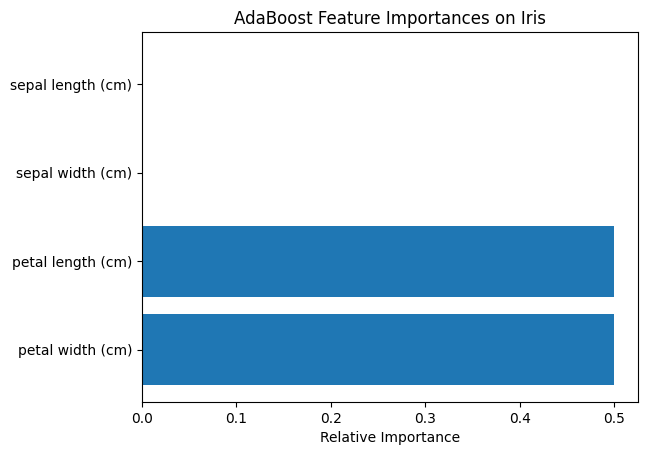

In [40]:
import matplotlib.pyplot as plt
import numpy as np

feat_names = load_iris().feature_names
importances = clf.feature_importances_

idx = np.argsort(importances)[::-1]

plt.barh([feat_names[i] for i in idx], importances[idx])
plt.xlabel("Relative Importance")
plt.title("AdaBoost Feature Importances on Iris")
plt.show()

In [27]:
from sklearn.datasets import load_breast_cancer
# Load Breast Cancer data (binary classification)
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create Gradient Boosting classifier
gbc = AdaBoostClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
# Evaluate and print results
print("Test accuracy:", gbc.score(X_test, y_test))
print("Feature importances:", gbc.feature_importances_)

c:\Users\User\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test accuracy: 0.9440559440559441
Feature importances: [0.   0.06 0.   0.03 0.03 0.06 0.   0.06 0.01 0.02 0.02 0.01 0.   0.06
 0.03 0.09 0.   0.02 0.05 0.03 0.01 0.05 0.03 0.07 0.06 0.   0.08 0.04
 0.07 0.01]


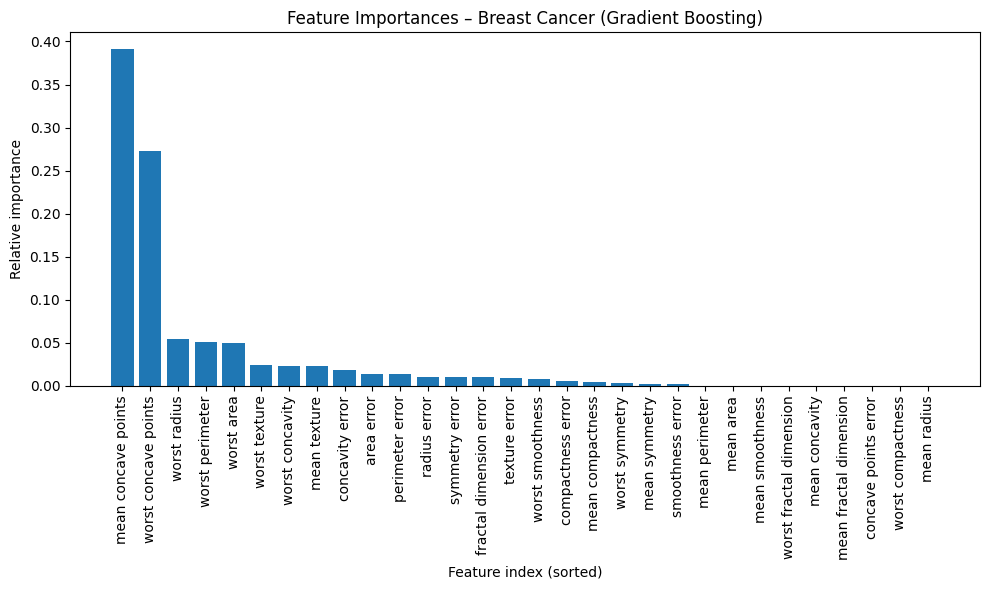

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Get feature names
feature_names = load_breast_cancer().feature_names

# Extract importances from your trained model
importances = gbc.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature index (sorted)")
plt.ylabel("Relative importance")
plt.title("Feature Importances – Breast Cancer (Gradient Boosting)")
plt.tight_layout()
plt.show()


### Gradient Boosting
Regression: https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer

### Gradient Boosting
Classification: https://www.youtube.com/watch?v=jxuNLH5dXCs&ab_channel=StatQuestwithJoshStarmer

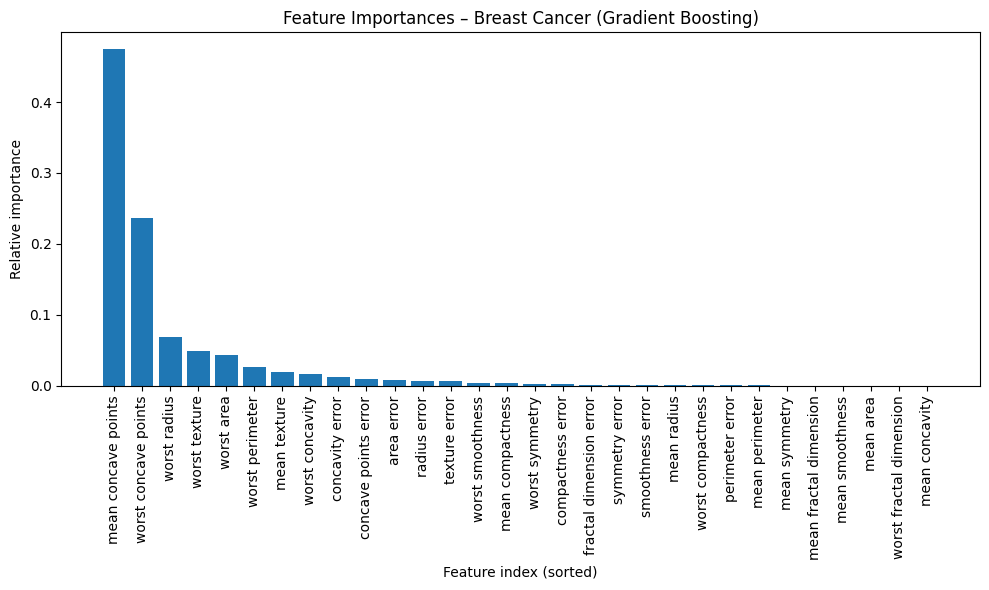

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# 1. Load data and train model
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
gbc = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbc.fit(X_train, y_train)

# 2. Extract feature importances
feature_names = load_breast_cancer().feature_names
importances = gbc.feature_importances_
indices = np.argsort(importances)[::-1]  # descending order

# 3. Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature index (sorted)")
plt.ylabel("Relative importance")
plt.title("Feature Importances – Breast Cancer (Gradient Boosting)")
plt.tight_layout()
plt.show()


### XGBoost
https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=8b1JEDvenQU&ab_channel=StatQuestwithJoshStarmer

c:\Users\User\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:12:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder", "verbose" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


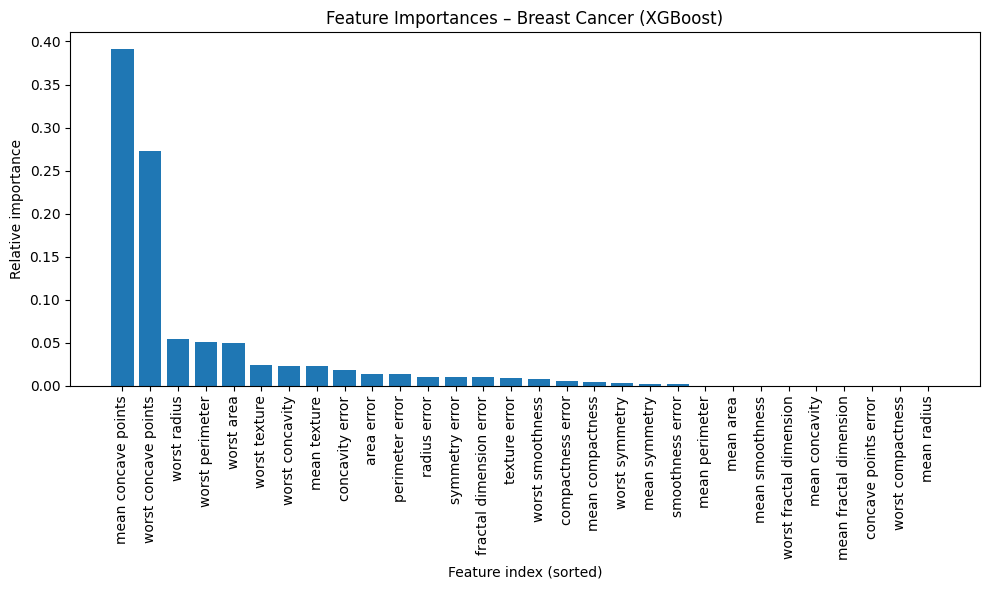

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 1. Load data and train model
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
xgb = XGBClassifier(
    n_estimators=10,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train)

# 2. Extract feature importances
feature_names = load_breast_cancer().feature_names
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]  # descending order

# 3. Plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature index (sorted)")
plt.ylabel("Relative importance")
plt.title("Feature Importances – Breast Cancer (XGBoost)")
plt.tight_layout()
plt.show()

In XGBoost’s scikit-learn API, the `eval_metric` parameter controls **which metric(s) XGBoost will compute and report during training** (e.g., on the training set and any validation sets you provide). It does **not** change the objective (which you set via `objective=`), but lets you monitor performance according to one or more criteria.

---

### `eval_metric='mlogloss'`

* **“mlogloss”** stands for **multi-class logarithmic loss** (a generalization of binary log-loss to multiple classes).
* For each training iteration (i.e., after adding each tree), XGBoost will compute:

  $$
    \text{mlogloss} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{ik} \log(p_{ik})
  $$

  where $y_{ik}$ is 1 if sample $i$ belongs to class $k$ (else 0), and $p_{ik}$ is the predicted probability for class $k$.
* Lower values of mlogloss indicate better probability calibration and classification confidence.

---

### Why It Matters

* **Monitoring**: You can watch the training and validation mlogloss curves to see whether the model is still improving or if it’s overfitting.
* **Early Stopping**: If you supply a `eval_set` and set `early_stopping_rounds`, XGBoost will stop training when your chosen metric (e.g., mlogloss on the validation set) hasn’t improved for that many rounds.
* **Multiple Metrics**: You can pass a list, e.g. `eval_metric=['mlogloss','merror']` to track both log-loss and classification error (“merror”) during training.

---

### Other Common `eval_metric` Options

| Metric     | Description                                 | Use Case                      |
| ---------- | ------------------------------------------- | ----------------------------- |
| `mlogloss` | Multi-class log-loss                        | Multi-class probability tasks |
| `logloss`  | Binary log-loss (for binary classification) | Binary classification         |
| `error`    | Binary classification error rate (0/1 loss) | Fast check of accuracy        |
| `merror`   | Multi-class classification error rate       | Multi-class accuracy check    |
| `auc`      | Area Under the ROC Curve (binary/multi)     | Imbalanced binary tasks       |
| `rmse`     | Root Mean Square Error                      | Regression                    |
| `mae`      | Mean Absolute Error                         | Regression                    |

---

### Example of Using `eval_metric` with Early Stopping

```python
xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,
    verbose=True
)
```

Here, XGBoost will stop if the validation mlogloss hasn’t improved in 10 consecutive rounds, potentially saving time and preventing overfitting.


In [30]:
from sklearn.datasets import load_digits

# Load Digits data (10 classes)
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create XGBoost classifier (using 10 trees for speed)
xgbc = XGBClassifier(n_estimators=10, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgbc.fit(X_train, y_train)
# Evaluate and print results
print("Test accuracy:", xgbc.score(X_test, y_test))

c:\Users\User\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:58:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test accuracy: 0.9622222222222222


c:\Users\User\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:10:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


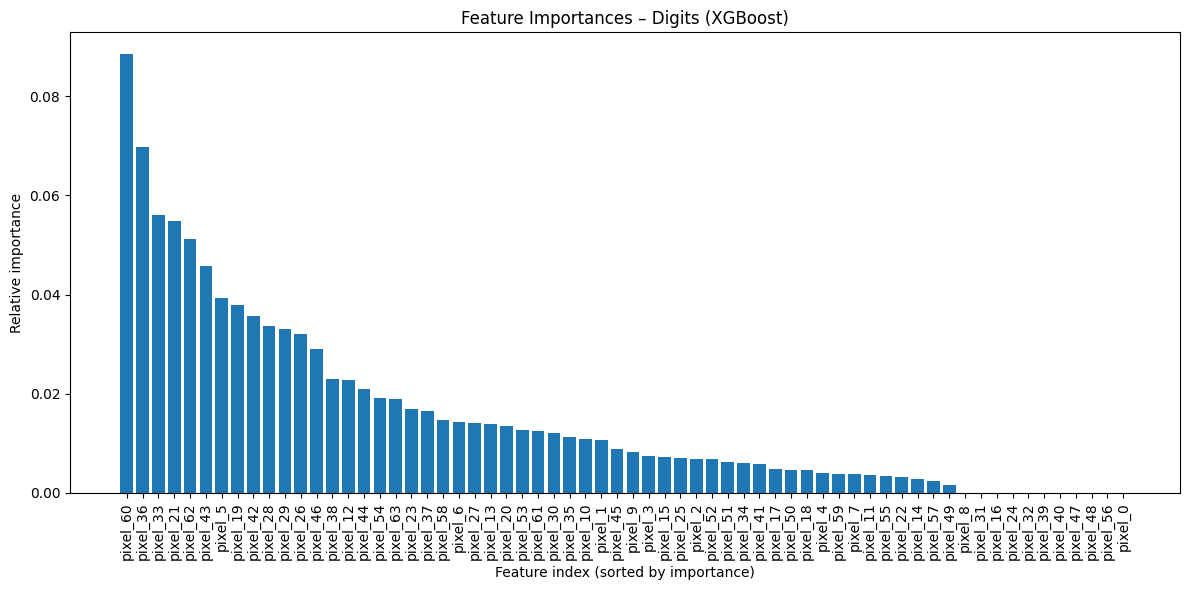

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 1. Load data and train model
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgbc = XGBClassifier(
    n_estimators=10,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgbc.fit(X_train, y_train)

# 2. Extract feature importances
importances = xgbc.feature_importances_
# Create feature names for each pixel
feature_names = [f"pixel_{i}" for i in range(X.shape[1])]
# Sort features by importance (descending)
indices = np.argsort(importances)[::-1]

# 3. Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature index (sorted by importance)")
plt.ylabel("Relative importance")
plt.title("Feature Importances – Digits (XGBoost)")
plt.tight_layout()
plt.show()


### Regression

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [32]:
# Load California Housing data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize and train
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbr = gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print(f"  RMSE: {rmse_gbr:.4f}")
print(f"  R² Score: {r2_gbr:.4f}")


Gradient Boosting Regressor:
  RMSE: 0.5422
  R² Score: 0.7756


In [34]:
# Initialize and train
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor:")
print(f"  RMSE: {rmse_xgb:.4f}")
print(f"  R² Score: {r2_xgb:.4f}")



XGBoost Regressor:
  RMSE: 0.5433
  R² Score: 0.7747


In [35]:
results = pd.DataFrame({
    "Model": ["Gradient Boosting", "XGBoost"],
    "RMSE": [rmse_gbr, rmse_xgb],
    "R² Score": [r2_gbr, r2_xgb]
})
print("\nModel Comparison:")
print(results)



Model Comparison:
               Model      RMSE  R² Score
0  Gradient Boosting  0.542215  0.775645
1            XGBoost  0.543348  0.774706


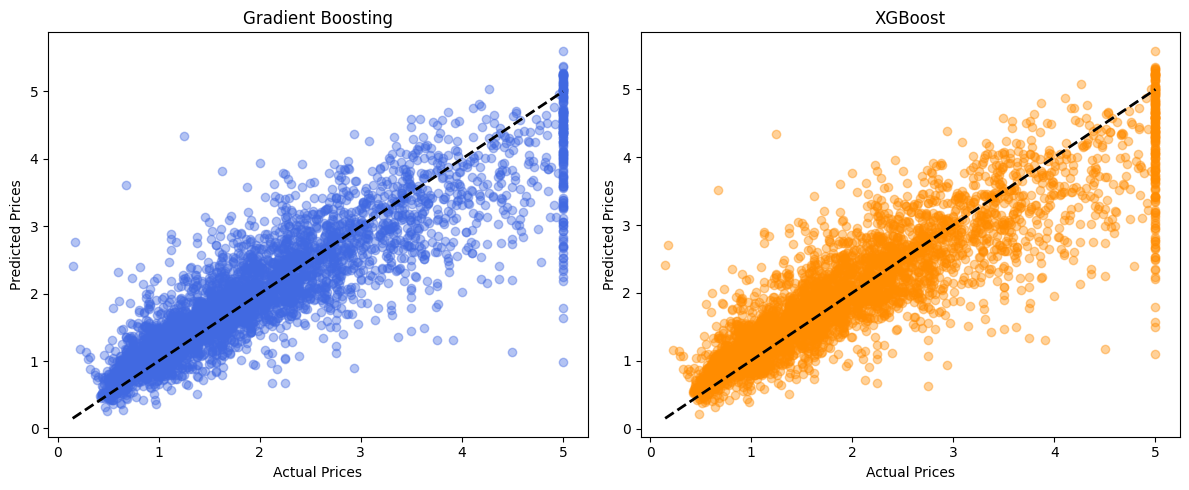

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Gradient Boosting
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_gbr, alpha=0.4, color="royalblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Gradient Boosting")

# XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.4, color="darkorange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("XGBoost")

plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22156\4264910715.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gbr_importance, y=gbr_importance.index, palette="Blues_r")


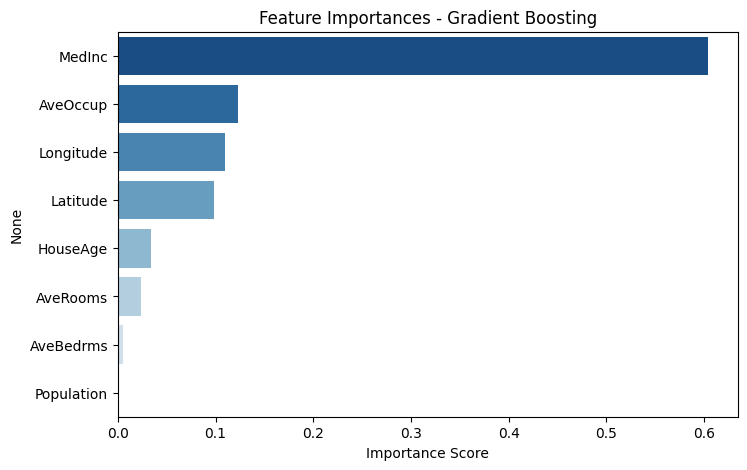

In [37]:
import seaborn as sns

# Get feature importances
gbr_importance = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=gbr_importance, y=gbr_importance.index, palette="Blues_r")
plt.title("Feature Importances - Gradient Boosting")
plt.xlabel("Importance Score")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22156\2075753732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance, y=xgb_importance.index, palette="Oranges_r")


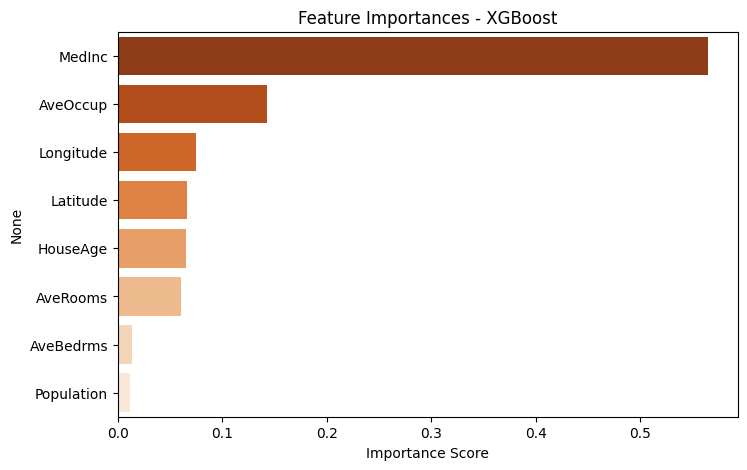

In [38]:
# Get feature importances
xgb_importance = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_importance, y=xgb_importance.index, palette="Oranges_r")
plt.title("Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.show()


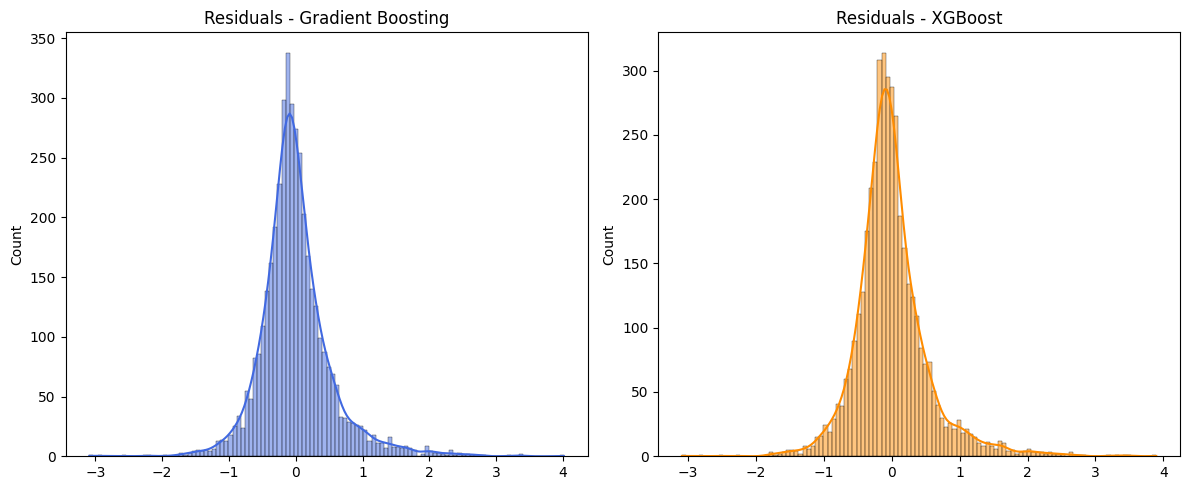

In [39]:
# Residuals
residuals_gbr = y_test - y_pred_gbr
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_gbr, kde=True, color="royalblue")
plt.title("Residuals - Gradient Boosting")

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, kde=True, color="darkorange")
plt.title("Residuals - XGBoost")

plt.tight_layout()
plt.show()


Absolutely! Here's a detailed explanation of each plot and what it tells you about the **performance and behavior** of your regression models:

---

### 📈 1. **Actual vs Predicted Plot**

#### Purpose:

Shows how well the model's predictions align with the actual values.

#### Explanation:

* Each dot represents a test sample.
* The diagonal dashed line (`y = x`) is the **ideal line**: perfect prediction.
* Points close to this line mean good predictions.
* Points far from the line mean larger prediction errors.

#### Interpretation:

* **Tighter clustering around the diagonal** indicates better predictive performance.
* If the dots form a clear linear pattern around the diagonal → the model generalizes well.
* **Wider spread or fan shape** might suggest underfitting or overfitting.

---

### 🌟 2. **Feature Importance Plot**

#### Purpose:

Helps you understand which features contribute most to the model’s predictions.

#### Explanation:

* The bars show how important each feature is to the model.
* Importance is calculated based on how often and how effectively a feature is used to split data across trees.

#### Interpretation:

* **Longer bars = higher importance**.
* Features at the top are the most influential for prediction.
* If many features have similar low importance, the model may be relying too much on noise.

#### Why two versions?

* You get to compare how **Gradient Boosting** and **XGBoost** interpret feature relevance differently.
* Helps assess **consistency and robustness** of feature influence across models.

---

### 📉 3. **Residual Plot (Histogram of Errors)**

#### Purpose:

Shows the distribution of prediction errors (i.e., how far predictions deviate from actual values).

#### Explanation:

* The residual is defined as: `residual = actual - predicted`.
* A **well-performing regression model** should have:

  * Residuals **centered around 0**
  * A **symmetric**, approximately normal distribution

#### Interpretation:

* **Tight and centered residuals around 0** → accurate predictions.
* **Skewed or long-tailed distribution** → model is consistently over/under-predicting in some regions.
* **Large variance in residuals** → possibly underfitting or noisy data.

---

### Summary Table

| Plot                        | What It Shows                      | Good Sign                       | Warning Sign                              |
| --------------------------- | ---------------------------------- | ------------------------------- | ----------------------------------------- |
| Actual vs Predicted         | Prediction accuracy                | Points near the diagonal        | Points scattered/far from line            |
| Feature Importance          | Contribution of each input feature | Top features match domain logic | All features have low or equal importance |
| Residuals (Error Histogram) | Error behavior across test samples | Bell-shaped curve centered at 0 | Skewed or wide error distribution         |

